In [57]:
    """
    満足度分析を用いたクラスタリング
    """
import numpy as np
import pandas as pd
import pycaret.clustering as pc

In [58]:
df_house=pd.read_csv('7-4-18_data.tsv',sep='\t',header=0) 
word = df_house.iloc[:,208:228] #検索キーワード("Q25"全て)
data_man = df_house.iloc[:,112:118] #サイトの使いやすさに関する満足度("Q8"全て)
data_site = df_house.iloc[:,[2,240,49]] #使用サイトをまとめたもの("SQ2","Q29","Q27",Q30)
datasite = data_site.dropna()
data_best = df_house["Q12_2"] #最もよく見たサイト
# data3_ = df_house.iloc[:, [188, 190]] 
data_act = df_house.iloc[:, 228:232] #賃貸情報サイトに対する行動("Q26"全て)
manzoku = df_house.iloc[:, 52:71] #表示に対する満足度("Q2"全て)
unite_data = pd.concat([word, data_man,data_site, data_best, data_act, manzoku], axis = 1)
unite_data = unite_data.dropna() #欠損値処理
unite_data = unite_data.astype("int")
unite_qst = unite_data.replace({"Q29":[3,4,5,6,7,10,13], "SQ7": [3,4,5,6,7,10,13]}, 28)
# unite_data = unite_data[unite_data["SQ7"]!=3]
# unite_data = unite_data[unite_data["SQ7"]!=4]
# unite_data = unite_data[unite_data["SQ7"]!=6]
# unite_data = unite_data[unite_data["SQ7"]!=10]
# unite_data = unite_data[unite_data["SQ7"]!=13]
# unite_data = unite_data[unite_data["SQ7"]!=19]
# unite_data = unite_data[unite_data["SQ7"]!=23]
# unite_data = unite_data[unite_data["Q29"]!=4]
# unite_data = unite_data[unite_data["Q29"]!=5]
# unite_data = unite_data[unite_data["Q29"]!=6]
# unite_data = unite_data[unite_data["Q29"]!=7]
# unite_data = unite_data[unite_data["Q29"]!=9]
# unite_data = unite_data[unite_data["Q29"]!=10]
# unite_data = unite_data[unite_data["Q29"]!=11]
# unite_data = unite_data[unite_data["Q29"]!=13]
# unite_data = unite_data[unite_data["Q29"]!=14]
# unite_data = unite_data[unite_data["Q29"]!=18]
# unite_data = unite_data[unite_data["Q29"]!=20]
result = data_site["Q29"] == data_site["SQ7"] #数値の一致かどうか調べる
data_site['hantei'] = result.map({True: 1, False: 0}) #一致していた場合1,そうでない場合0
unite_word = unite_qst.iloc[:, :20] #欠損値処理済み(以下同)の検索キーワード("Q25"全て)
manz_unite = unite_qst.iloc[:, 34:] #表示に対する満足度("Q2"全て)
unite_more = unite_qst.iloc[:, 20:26] #サイトの使いやすさに関する満足度("Q8"全て)
unite_site = unite_qst.iloc[:, 27:28]#使用サイトをまとめたもの("SQ2","Q29","Q27",Q30)
unite_manzoku = pd.concat([manz_unite, unite_more, unite_site],axis = 1) #満足度関連を結合したもの 
unite_manzoku


,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,...,Q2_17,Q2_18,Q2_19,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q29
0,7,7,7,10,10,10,8,8,10,9,...,10,9,7,7,8,8,8,8,7,8
1,7,7,7,6,5,6,7,6,5,6,...,6,7,8,6,7,6,7,8,8,8
2,7,7,6,7,5,6,7,7,8,7,...,6,6,7,5,5,7,6,7,7,24
3,9,9,9,9,9,8,9,8,9,9,...,9,8,8,8,9,9,9,9,8,8
6,8,8,8,8,8,8,8,8,8,8,...,9,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,28
1320,7,7,6,7,6,6,6,6,6,6,...,6,6,6,6,6,6,5,6,6,8
1321,7,7,7,6,5,5,6,8,6,7,...,8,8,9,6,6,6,6,7,9,24
1322,9,10,10,10,9,8,10,8,9,10,...,9,9,10,8,7,7,8,9,10,8


In [59]:
set_manzoku = pc.setup(unite_manzoku, normalize = True, session_id = 156) #pycaretを起動し初期化処理
best_manzoku = pc.create_model("kmeans", num_clusters = 6)#kmeansmodelの構築
best_manzoku 

,Description,Value
0,Session id,156
1,Original data shape,"(986, 26)"
2,Transformed data shape,"(986, 26)"
3,Numeric features,26
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1439,316.3475,1.9795,0,0,0


KMeans(n_clusters=6, random_state=156)

In [60]:
tune_manzoku = pc.assign_model(best_manzoku) #データをクラスごとに割り当てる処理
tune_manzoku

,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,...,Q2_18,Q2_19,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q29,Cluster
0,7,7,7,10,10,10,8,8,10,9,...,9,7,7,8,8,8,8,7,8,Cluster 1
1,7,7,7,6,5,6,7,6,5,6,...,7,8,6,7,6,7,8,8,8,Cluster 5
2,7,7,6,7,5,6,7,7,8,7,...,6,7,5,5,7,6,7,7,24,Cluster 2
3,9,9,9,9,9,8,9,8,9,9,...,8,8,8,9,9,9,9,8,8,Cluster 4
6,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,28,Cluster 3
1320,7,7,6,7,6,6,6,6,6,6,...,6,6,6,6,6,5,6,6,8,Cluster 2
1321,7,7,7,6,5,5,6,8,6,7,...,8,9,6,6,6,6,7,9,24,Cluster 5
1322,9,10,10,10,9,8,10,8,9,10,...,9,10,8,7,7,8,9,10,8,Cluster 4


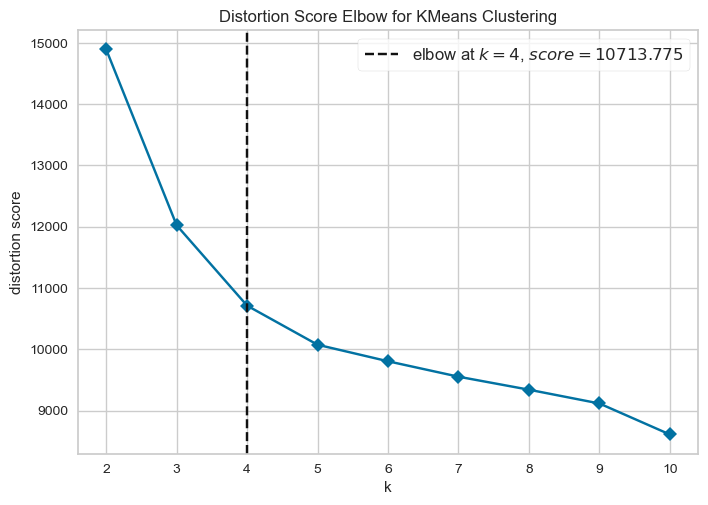

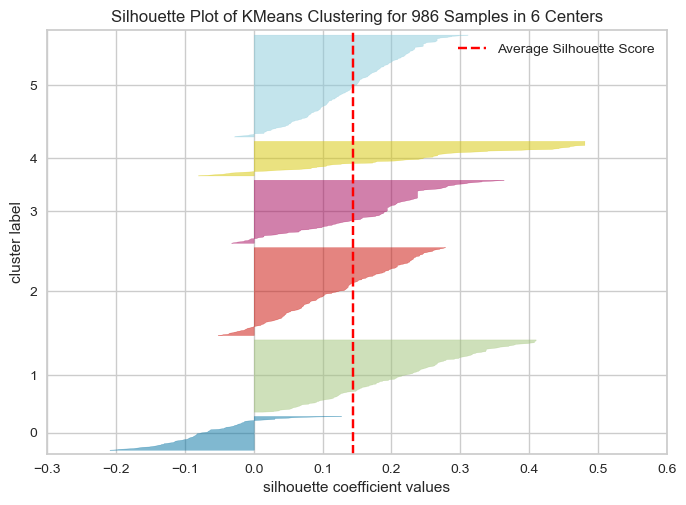

In [61]:
pc.plot_model(best_manzoku, plot = "cluster") #2次シルエット分析元平面分布

pc.plot_model(best_manzoku, plot="elbow") #エルボー法

pc.plot_model(best_manzoku, plot="silhouette") #シルエット分析

In [62]:
pc.plot_model(best_manzoku, plot = "distribution", feature = "Q29")

In [63]:
pc.evaluate_model(best_manzoku)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…